**This notebook implements a 8 layer CNN on OCT image dataset to classify the diseases**

In [1]:
# Import the required libraries

import os
import random

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [2]:
# Store the base directory path

base_dir = os.path.join("C:/Users/KIIT/Desktop/66 Days of Data/Day24/chest_xray")
print('Base directory --> ', os.listdir(base_dir))

Base directory -->  ['test', 'train', 'val']


In [3]:
# Store the train, validation and test directory paths

train_dir = os.path.join(base_dir + "/train/")
print("Train Directory --> ", os.listdir(train_dir))

validation_dir = os.path.join(base_dir + "/val/")
print("Validation Directory --> ", os.listdir(validation_dir))

test_dir = os.path.join(base_dir + "/test/")
print("Test Directory --> ", os.listdir(test_dir))

Train Directory -->  ['NORMAL', 'PNEUMONIA']
Validation Directory -->  ['NORMAL', 'PNEUMONIA']
Test Directory -->  ['NORMAL', 'PNEUMONIA']


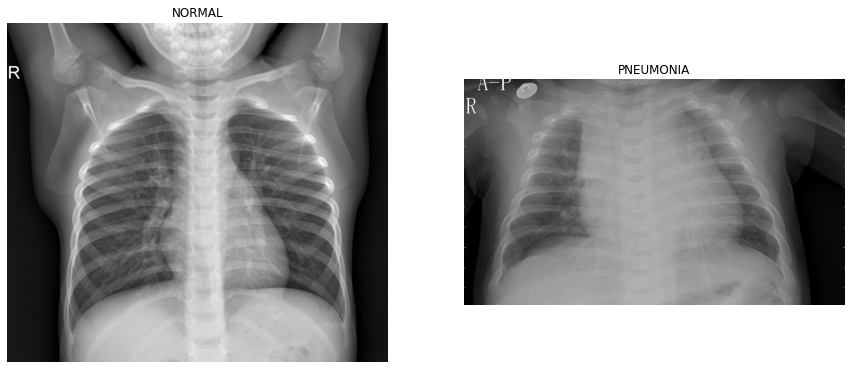

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

normal = random.choice(os.listdir(train_dir + "NORMAL"))
normal_image = load_img(train_dir + "NORMAL/" + normal)
ax[0].imshow(normal_image)
ax[0].set_title("NORMAL")
ax[0].axis("Off")

pneumonia = random.choice(os.listdir(train_dir + "PNEUMONIA"))
pneumonia_image = load_img(train_dir + "PNEUMONIA/" + pneumonia)
ax[1].imshow(pneumonia_image)
ax[1].set_title("PNEUMONIA")
ax[1].axis("Off")



plt.show()

In [5]:
from tensorflow.keras.applications import Xception

backbone = Xception(
    input_shape=(150, 150, 3),
    include_top=False
)

model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

83689472/83683744 [==============================] - 14s 0us/step


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2049      
Total params: 20,863,529
Trainable params: 20,809,001
Non-trainable params: 54,528
_________________________________________________________________


In [7]:
metrics_list = ['accuracy']

In [8]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = metrics_list)

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150), class_mode = 'binary', batch_size = 100)

Found 5216 images belonging to 2 classes.


In [10]:
validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size = (150, 150), class_mode = 'binary', batch_size = 16)

Found 16 images belonging to 2 classes.


In [11]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size = (150, 150), class_mode = 'binary', batch_size = 44)

Found 624 images belonging to 2 classes.


In [13]:
history = model.fit_generator(
    train_generator,    
    epochs = 10,
    validation_data = validation_generator,
    verbose = 1)

Epoch 1/10
 2/53 [>.............................] - ETA: 16:10 - loss: 0.1018 - accuracy: 0.9550

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

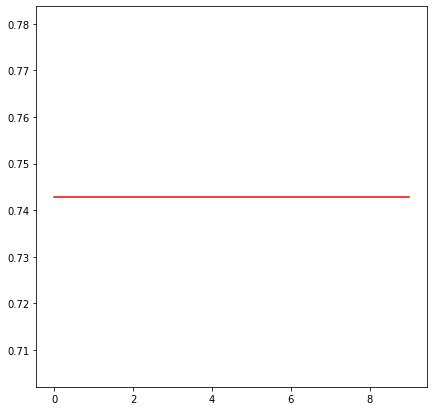

In [60]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(7,7))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize = (7,7))

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [61]:
model.predict(test_generator, steps = int(968/44))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [62]:
model.evaluate(test_generator)

15/15 [==============================] - 6s 392ms/step - loss: 5.7185 - accuracy: 0.6250


[5.718464374542236, 0.625]